In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA


In [2]:
features = pd.read_csv('data/fma_metadata/df_analisi.csv',index_col=[0], header=[0,1,2])

features

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   
...               ...        ...                ...               ...   
155297      30.287067  12.060067          20.706787         40.720093   
155298      39.359367  18.604885           5.868375         39.627396   
155306      40.537926  28.671246           4.375974         40.628235   
155307      35.382370  22.123117          -0.383395         48.715477   
155314      26.786989  22.369673           0.011010         39.460281   

feature                           tonnetz metadata                              
statistics                  min       std      set         track                
number             04        02        01   subset     genre_top genre_top_Cat  
track_id                                                                        
2           31.513493  2.296826  0.019809    small       Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium       Hip-Hop             7  
5           33.707951  2.314010  0.025550    small       Hip-Hop             7  
10          28.711344  4.415900  0.021413    small           Pop            12  
134         32.2243

In [3]:
features.head()

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   

feature                           tonnetz metadata                          
statistics                  min       std      set     track                
number             04        02        01   subset genre_top genre_top_Cat  
track_id                                                                    
2           31.513493  2.296826  0.019809    small   Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium   Hip-Hop             7  
5           33.707951  2.314010  0.025550    small   Hip-Hop             7  
10          28.711344  4.415900  0.021413    small       Pop            12  
134         32.224319  1.270560  0.024258   medium   Hip-Hop             7  

[5 rows x 23 columns]

In [4]:
features['metadata','track','genre_top'].value_counts()

Rock                   7103
Electronic             6314
Experimental           2251
Hip-Hop                2201
Folk                   1519
Instrumental           1350
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: (metadata, track, genre_top), dtype: int64

In [5]:

attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top')]


df_SOLO_FEATURES=features.drop([('metadata','track','genre_top'),('metadata','set','subset'),('metadata','track','genre_top_Cat')], axis = 1)
df_SOLO_FEATURES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (chroma_stft, mean, 01)             25000 non-null  float64
 1   (mfcc, max, 01)                     25000 non-null  float64
 2   (mfcc, max, 03)                     25000 non-null  float64
 3   (mfcc, max, 04)                     25000 non-null  float64
 4   (mfcc, max, 07)                     25000 non-null  float64
 5   (mfcc, max, 11)                     25000 non-null  float64
 6   (mfcc, mean, 02)                    25000 non-null  float64
 7   (mfcc, min, 02)                     25000 non-null  float64
 8   (mfcc, min, 04)                     25000 non-null  float64
 9   (mfcc, min, 05)                     25000 non-null  float64
 10  (mfcc, min, 11)                     25000 non-null  float64
 11  (mfcc, skew, 04)                    2500

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C7CA423DC0>,
      dtype=object)

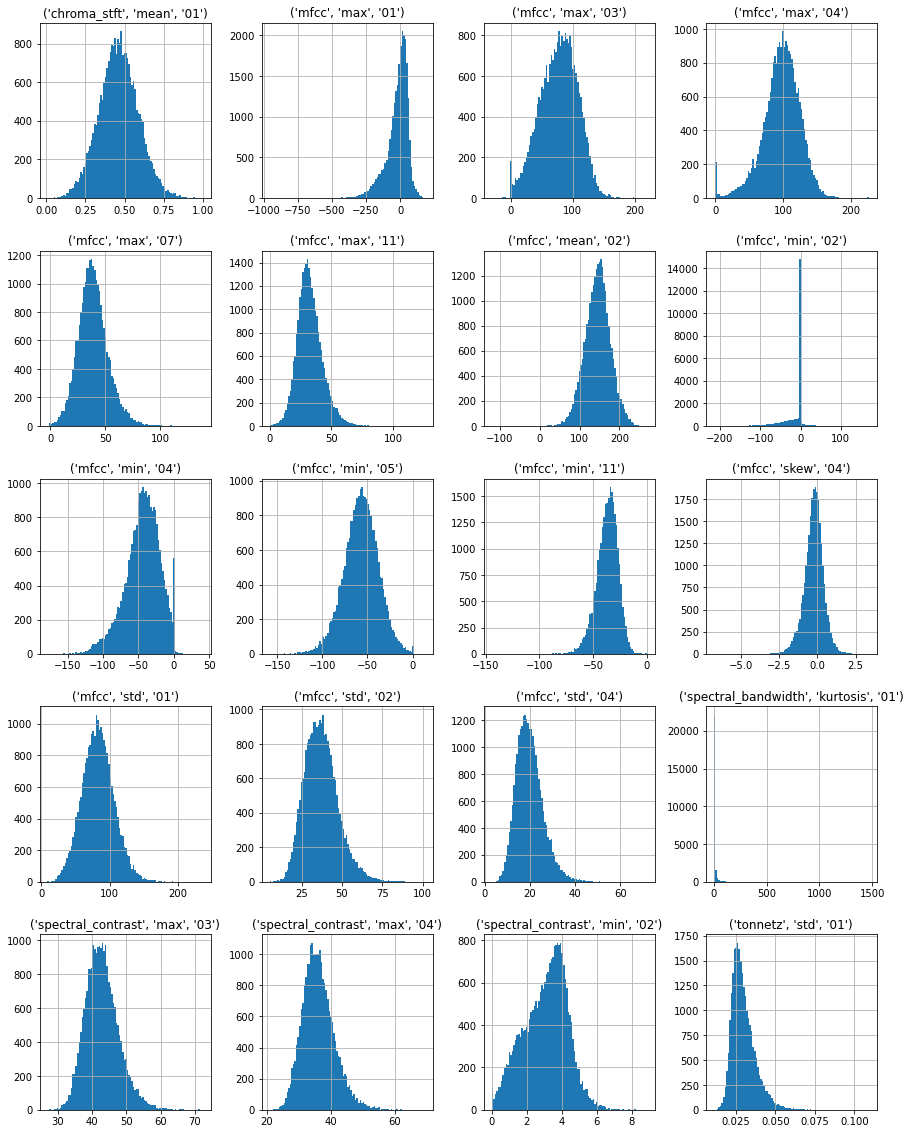

In [6]:
df_SOLO_FEATURES.hist(bins=100, figsize=(15, 20))


In [7]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[ 1.86401457,  0.6150445 , -0.81877701, ..., -0.92131634,
        -0.63091256, -1.32208865],
       [-0.10348244,  0.62406228, -0.01565505, ..., -0.92921645,
        -1.94893681, -0.46633816],
       [ 0.14844478, -0.24758031, -0.88649537, ..., -0.48550455,
        -0.61713665, -0.56706532],
       ...,
       [-0.74373272,  0.16011768,  0.35691634, ..., -0.16975495,
        -0.29982352,  1.32080363],
       [-0.83523021,  0.08434064, -0.49527789, ...,  0.0099262 ,
        -0.49073173,  0.70909713],
       [ 0.71311626,  0.06668385, -1.46894598, ..., -0.90788814,
        -0.20152869, -0.32983617]])

In [8]:
features = pd.DataFrame(X,columns=df_SOLO_FEATURES.columns, index=df_SOLO_FEATURES.index)
features[('metadata','track','genre_top')]=y
features.head()

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   

feature                                             ...                      \
statistics      mean       min                      ...      skew       std   
number            02        02        04        05  ...        04        01   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.444004  0.622077   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  0.333143  1.210474   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.203958  0.505090   
10          0.362832  0.469769 -0.265699  0.621925  ... -0.511909  0.831299   
134        -0.625369  0.437693 -1.880751 -0.548531  ... -0.381898  0.832834   

feature                        spectral_bandwidth spectral_contrast            \
statistics                               kurtosis               max             
number            02        04                 01                03        04   
track_id                                                                        
2           0.127778  0.148286          -0.114547         -0.721109 -0.921316   
3           0.377015  0.358945          -0.173787         -0.148690 -0.929216   
5           0.203623  0.743308          -0.232903         -0.785605 -0.485505   
10          0.682846 -0.983444          -0.251092          0.517845 -1.477813   
134         0.954349  2.841332          -0.253663         -0.273997 -0.780149   

feature                tonnetz  metadata  
statistics       min       std     track  
number            02        01 genre_top  
track_id                                  
2          -0.630913 -1.322089   Hip-Hop  
3          -1.948937 -0.466338   Hip-Hop  
5          -0.617137 -0.567065   Hip-Hop  
10          1.067838 -1.111215       Pop  
134        -1.453616 -0.736969   Hip-Hop  

[5 rows x 21 columns]

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (chroma_stft, mean, 01)             25000 non-null  float64
 1   (mfcc, max, 01)                     25000 non-null  float64
 2   (mfcc, max, 03)                     25000 non-null  float64
 3   (mfcc, max, 04)                     25000 non-null  float64
 4   (mfcc, max, 07)                     25000 non-null  float64
 5   (mfcc, max, 11)                     25000 non-null  float64
 6   (mfcc, mean, 02)                    25000 non-null  float64
 7   (mfcc, min, 02)                     25000 non-null  float64
 8   (mfcc, min, 04)                     25000 non-null  float64
 9   (mfcc, min, 05)                     25000 non-null  float64
 10  (mfcc, min, 11)                     25000 non-null  float64
 11  (mfcc, skew, 04)                    2500

In [10]:
df=features.copy()

In [11]:
df.head()


feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   

feature                                             ...                      \
statistics      mean       min                      ...      skew       std   
number            02        02        04        05  ...        04        01   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.444004  0.622077   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  0.333143  1.210474   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.203958  0.505090   
10          0.362832  0.469769 -0.265699  0.621925  ... -0.511909  0.831299   
134        -0.625369  0.437693 -1.880751 -0.548531  ... -0.381898  0.832834   

feature                        spectral_bandwidth spectral_contrast            \
statistics                               kurtosis               max             
number            02        04                 01                03        04   
track_id                                                                        
2           0.127778  0.148286          -0.114547         -0.721109 -0.921316   
3           0.377015  0.358945          -0.173787         -0.148690 -0.929216   
5           0.203623  0.743308          -0.232903         -0.785605 -0.485505   
10          0.682846 -0.983444          -0.251092          0.517845 -1.477813   
134         0.954349  2.841332          -0.253663         -0.273997 -0.780149   

feature                tonnetz  metadata  
statistics       min       std     track  
number            02        01 genre_top  
track_id                                  
2          -0.630913 -1.322089   Hip-Hop  
3          -1.948937 -0.466338   Hip-Hop  
5          -0.617137 -0.567065   Hip-Hop  
10          1.067838 -1.111215       Pop  
134        -1.453616 -0.736969   Hip-Hop  

[5 rows x 21 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C7CA6677F0>,
      dtype=object)

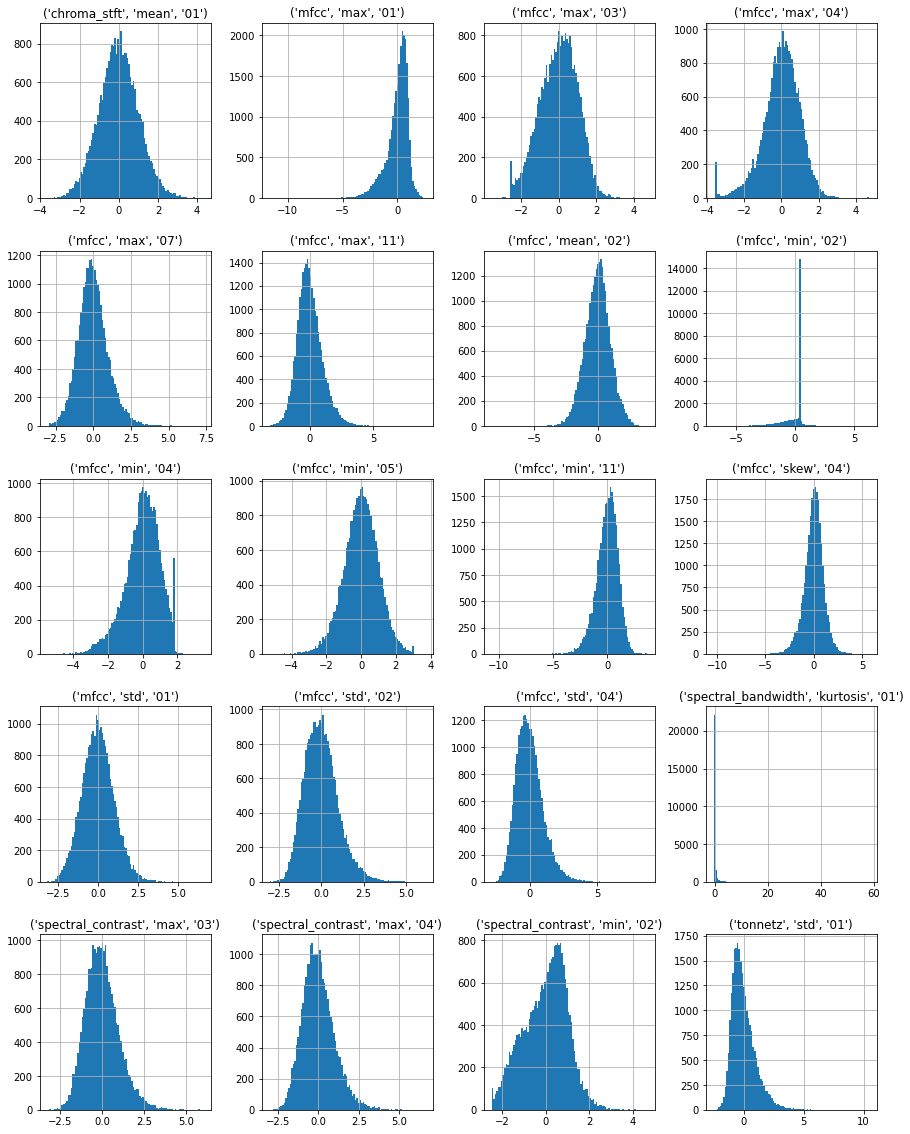

In [12]:

df.hist(bins=100, figsize=(15, 20))


## BoxPlot

In [13]:
attributes = [col for col in df.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 
attributes

[('chroma_stft', 'mean', '01'),
 ('mfcc', 'max', '01'),
 ('mfcc', 'max', '03'),
 ('mfcc', 'max', '04'),
 ('mfcc', 'max', '07'),
 ('mfcc', 'max', '11'),
 ('mfcc', 'mean', '02'),
 ('mfcc', 'min', '02'),
 ('mfcc', 'min', '04'),
 ('mfcc', 'min', '05'),
 ('mfcc', 'min', '11'),
 ('mfcc', 'skew', '04'),
 ('mfcc', 'std', '01'),
 ('mfcc', 'std', '02'),
 ('mfcc', 'std', '04'),
 ('spectral_bandwidth', 'kurtosis', '01'),
 ('spectral_contrast', 'max', '03'),
 ('spectral_contrast', 'max', '04'),
 ('spectral_contrast', 'min', '02'),
 ('tonnetz', 'std', '01')]

<function matplotlib.pyplot.show(*args, **kw)>

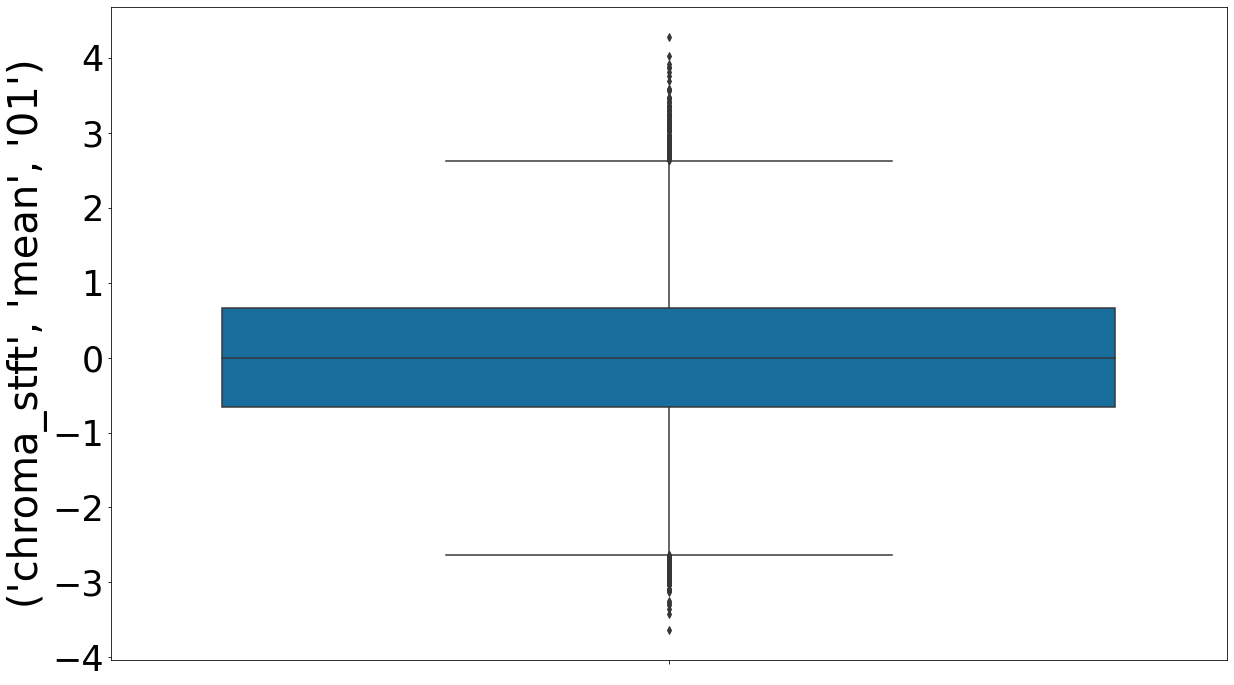

In [14]:
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
sns.boxplot(y=('chroma_stft', 'mean', '01'), data=df, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

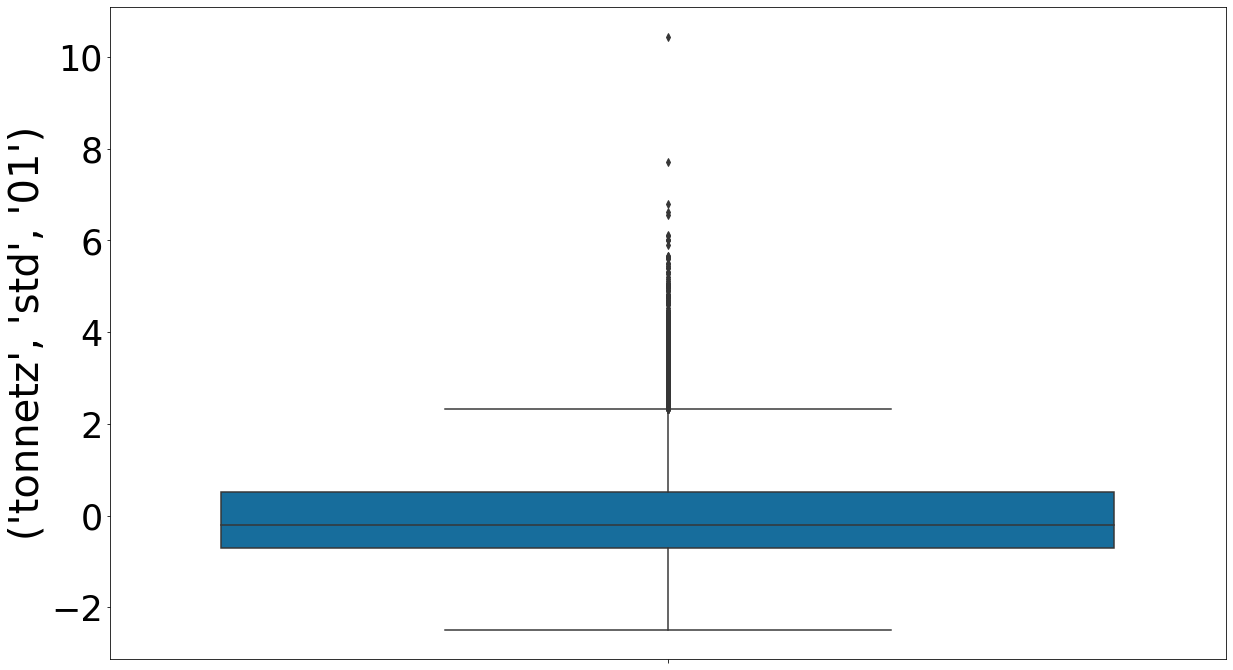

In [15]:
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
sns.boxplot(y=('tonnetz', 'std', '01'), data=df, palette="colorblind")
plt.show

In [16]:
boxplot = sns.boxplot(x=attributes,y=df)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
df.describe()

feature      chroma_stft          mfcc                              \
statistics          mean           max                               
number                01            01            03            04   
count       2.500000e+04  2.500000e+04  2.500000e+04  2.500000e+04   
mean        4.558398e-16 -1.389433e-16 -8.149037e-17  2.857214e-16   
std         1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00   
min        -3.633764e+00 -1.166779e+01 -3.561879e+00 -3.637540e+00   
25%        -6.599741e-01 -4.379388e-01 -6.895499e-01 -5.473978e-01   
50%        -7.361122e-03  2.310908e-01  5.042163e-02  6.804429e-02   
75%         6.562499e-01  6.786657e-01  7.156960e-01  6.579212e-01   
max         4.282108e+00  2.498166e+00  4.693541e+00  4.699851e+00   

feature                                                             \
statistics                                      mean           min   
number                07            11            02            02   
count       2.500000e+04  2.500000e+04  2.500000e+04  2.500000e+04   
mean        4.792255e-16 -1.577050e-16  6.914735e-16  7.957723e-16   
std         1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00   
min        -3.038175e+00 -3.179546e+00 -8.335385e+00 -6.872815e+00   
25%        -6.533501e-01 -6.590979e-01 -6.388532e-01 -2.003240e-01   
50%        -6.560932e-02 -9.559978e-02  2.656666e-02  4.697695e-01   
75%         5.760796e-01  5.693734e-01  6.402610e-01  4.697695e-01   
max         7.268657e+00  9.080338e+00  3.865849e+00  6.246202e+00   

feature                                                             \
statistics                                                    skew   
number                04            05            11            04   
count       2.500000e+04  2.500000e+04  2.500000e+04  2.500000e+04   
mean        1.964140e-16 -5.252998e-16  4.179301e-16 -3.037570e-18   
std         1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00   
min        -5.464075e+00 -5.265237e+00 -1.064962e+01 -1.036121e+01   
25%        -5.736550e-01 -6.319035e-01 -5.895474e-01 -5.625970e-01   
50%         8.180005e-02  2.261113e-02  9.454022e-02  5.497764e-02   
75%         7.006258e-01  6.654655e-01  6.902792e-01  6.141816e-01   
max         3.456572e+00  3.665048e+00  3.657044e+00  5.702941e+00   

feature                                              spectral_bandwidth  \
statistics           std                                       kurtosis   
number                01            02            04                 01   
count       2.500000e+04  2.500000e+04  2.500000e+04       2.500000e+04   
mean       -1.235101e-16  1.349187e-16 -1.425504e-16      -4.511946e-17   
std         1.000020e+00  1.000020e+00  1.000020e+00       1.000020e+00   
min        -3.151970e+00 -3.053178e+00 -2.825824e+00      -3.399187e-01   
25%        -6.794654e-01 -7.100652e-01 -7.092574e-01      -2.731277e-01   
50%        -2.758196e-02 -7.714528e-02 -1.084960e-01      -2.203429e-01   
75%         6.313996e-01  5.945274e-01  5.783563e-01      -7.384976e-02   
max         6.508873e+00  6.102383e+00  8.694571e+00       5.811751e+01   

feature    spectral_contrast                                   tonnetz  
statistics               max                         min           std  
number                    03            04            02            01  
count           2.500000e+04  2.500000e+04  2.500000e+04  2.500000e+04  
mean           -1.196936e-15 -2.272937e-16 -4.276024e-17 -7.897571e-16  
std             1.000020e+00  1.000020e+00  1.000020e+00  1.000020e+00  
min            -3.257782e+00 -3.036876e+00 -2.472157e+00 -2.486869e+00  
25%            -6.970461e-01 -6.905792e-01 -6.995505e-01 -6.968884e-01  
50%            -7.326804e-02 -9.060201e-02  1.207772e-01 -1.989045e-01  
75%             5.931002e-01  5.884067e-01  7.143205e-01  5.081707e-01  
max             6.005290e+00  6.597527e+00  4.626731e+00  1.044348e+01

In [18]:
prova=df.copy()
prova=prova.drop([('metadata','track','genre_top')],axis=1)
for i in attributes:
    Q1 = prova[i].quantile(0.25)
    Q3 = prova[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
((prova < (Q1 - 1.5 * IQR)) | (prova > (Q3 + 1.5 * IQR))).sum()

feature             statistics  number
chroma_stft         mean        01        436
mfcc                max         01        659
                                03        327
                                04        615
                                07        603
                                11        631
                    mean        02        475
                    min         02        997
                                04        458
                                05        514
                                11        467
                    skew        04        617
                    std         01        433
                                02        586
                                04        568
spectral_bandwidth  kurtosis    01        438
spectral_contrast   max         03        570
                                04        575
                    min         02        188
tonnetz             std         01        710
dtype: int64

In [19]:
df['outliers']=np.zeros(25000)

In [20]:
df.head()

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   

feature                                             ...                      \
statistics      mean       min                      ...       std             
number            02        02        04        05  ...        01        02   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.622077  0.127778   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  1.210474  0.377015   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.505090  0.203623   
10          0.362832  0.469769 -0.265699  0.621925  ...  0.831299  0.682846   
134        -0.625369  0.437693 -1.880751 -0.548531  ...  0.832834  0.954349   

feature              spectral_bandwidth spectral_contrast                      \
statistics                     kurtosis               max                 min   
number            04                 01                03        04        02   
track_id                                                                        
2           0.148286          -0.114547         -0.721109 -0.921316 -0.630913   
3           0.358945          -0.173787         -0.148690 -0.929216 -1.948937   
5           0.743308          -0.232903         -0.785605 -0.485505 -0.617137   
10         -0.983444          -0.251092          0.517845 -1.477813  1.067838   
134         2.841332          -0.253663         -0.273997 -0.780149 -1.453616   

feature      tonnetz  metadata outliers  
statistics       std     track           
number            01 genre_top           
track_id                                 
2          -1.322089   Hip-Hop      0.0  
3          -0.466338   Hip-Hop      0.0  
5          -0.567065   Hip-Hop      0.0  
10         -1.111215       Pop      0.0  
134        -0.736969   Hip-Hop      0.0  

[5 rows x 22 columns]

In [21]:
for i in attributes:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    
    for row in df[i].items():
        if (row[1] < Q1 - 1.5 * IQR):
            value= abs((Q1 - 1.5 * IQR) -row[1])
            if value > df['outliers'].loc[row[0]]:
                df.at[row[0],'outliers']=value
            
    for row in df[i].items():
        if (row[1] > Q3 + 1.5 * IQR):
            value= abs( row[1] - (Q3 + 1.5 * IQR))
            if value > df['outliers'].loc[row[0]]:
                df.at[row[0],'outliers']=value
            
        
        

In [22]:
df['outliers'].value_counts()

0.000000    15847
1.183051       14
1.183051       12
1.183051       10
1.183051        8
            ...  
0.823649        1
0.620019        1
0.515756        1
0.866151        1
0.480353        1
Name: outliers, Length: 9072, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (chroma_stft, mean, 01)             25000 non-null  float64
 1   (mfcc, max, 01)                     25000 non-null  float64
 2   (mfcc, max, 03)                     25000 non-null  float64
 3   (mfcc, max, 04)                     25000 non-null  float64
 4   (mfcc, max, 07)                     25000 non-null  float64
 5   (mfcc, max, 11)                     25000 non-null  float64
 6   (mfcc, mean, 02)                    25000 non-null  float64
 7   (mfcc, min, 02)                     25000 non-null  float64
 8   (mfcc, min, 04)                     25000 non-null  float64
 9   (mfcc, min, 05)                     25000 non-null  float64
 10  (mfcc, min, 11)                     25000 non-null  float64
 11  (mfcc, skew, 04)                    2500

In [24]:
df

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   
...                ...       ...       ...       ...       ...       ...   
155297       -0.430592  0.305315  0.561155 -1.791943 -0.908838 -1.243676   
155298       -0.187850 -0.650332  0.125382  0.985945 -0.700850  0.569318   
155306       -0.743733  0.160118  0.356916  0.681264 -0.714185  1.418310   
155307       -0.835230  0.084341 -0.495278 -0.159603  0.156442  0.103322   
155314        0.713116  0.066684 -1.468946 -0.086022 -0.989351  0.172696   

feature                                             ...                      \
statistics      mean       min                      ...       std             
number            02        02        04        05  ...        01        02   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.622077  0.127778   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  1.210474  0.377015   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.505090  0.203623   
10          0.362832  0.469769 -0.265699  0.621925  ...  0.831299  0.682846   
134        -0.625369  0.437693 -1.880751 -0.548531  ...  0.832834  0.954349   
...              ...       ...       ...       ...  ...       ...       ...   
155297      0.579622  0.469769  0.601930  1.504507  ...  0.370239 -0.659405   
155298      0.479782  0.469769  1.491871 -0.629697  ...  0.490100  0.202841   
155306      1.007887  0.469769 -0.219917 -0.712982  ...  1.100262  0.314853   
155307     -0.665914  0.269297 -0.264420 -2.180229  ... -0.123083 -0.175140   
155314      0.665470  0.461383 -0.452329  0.084216  ... -0.809713 -0.992058   

feature              spectral_bandwidth spectral_contrast                      \
statistics                     kurtosis               max                 min   
number            04                 01                03        04        02   
track_id                                                                        
2           0.148286          -0.114547         -0.721109 -0.921316 -0.630913   
3           0.358945          -0.173787         -0.148690 -0.929216 -1.948937   
5           0.743308          -0.232903         -0.785605 -0.485505 -0.617137   
10         -0.983444          -0.251092          0.517845 -1.477813  1.067838   
134         2.841332          -0.253663         -0.273997 -0.780149 -1.453616   
...              ...                ...               ...       ...       ...   
155297     -1.310667           0.554218         -0.438450 -0.915637  0.932068   
155298     -0.214119          -0.035324         -0.661214  0.299440  1.663762   
155306      1.472445          -0.094618         -0.457176 -0.169755 -0.299824   
155307      0.375342          -0.283712          1.191542  0.009926 -0.490732   
155314      0.416651          -0.268042         -0.695283 -0.907888 -0.201529   

feature      tonnetz      metadata  outliers  
statistics       std         track            
number            01     genre_top            
track_id                                      
2          -1.322089       Hip-Hop  0.000000  
3          -0.466338       Hip-Hop  0.000000  
5          -0.567065       Hip-Hop  0.443882  
10         -1.111215           Pop  0.000000  
134        -0.736969       Hip-Hop  0.331555  
...              ...           ...

In [25]:
df_outliers=df.loc[df['outliers'] != 0]

In [26]:
df_outliers

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   
181          -0.645366 -0.010562 -1.774369  0.247746  0.934620 -1.060708   
194          -0.760098 -0.637791 -0.515377 -0.400703 -0.977573 -1.209848   
198          -1.196538 -0.095955 -0.224131 -0.208932 -1.232586 -0.371099   
...                ...       ...       ...       ...       ...       ...   
155291        0.803122 -0.929969 -0.221744 -2.015620 -0.625755 -0.082394   
155292       -0.096593 -0.564713 -0.263080 -2.040051 -1.267956 -1.496979   
155295        1.258615 -1.899996  0.969985 -1.087319 -0.306528  0.332392   
155297       -0.430592  0.305315  0.561155 -1.791943 -0.908838 -1.243676   
155314        0.713116  0.066684 -1.468946 -0.086022 -0.989351  0.172696   

feature                                             ...                      \
statistics      mean       min                      ...       std             
number            02        02        04        05  ...        01        02   
track_id                                            ...                       
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.505090  0.203623   
134        -0.625369  0.437693 -1.880751 -0.548531  ...  0.832834  0.954349   
181         0.485203  0.469769  1.048903  0.270885  ... -0.883794 -0.917076   
194         0.987412  0.469769  0.932582 -0.145009  ... -0.054891 -0.262258   
198         0.838352  0.469769  1.117963 -0.125529  ... -0.646344 -0.512012   
...              ...       ...       ...       ...  ...       ...       ...   
155291      0.349584  0.469769  0.141767  0.798314  ...  0.860712  1.852823   
155292      0.680972  0.467927  0.412810  0.029220  ...  0.092502  1.816878   
155295      1.545950  0.448165 -0.639698 -0.109923  ...  0.559976 -0.747998   
155297      0.579622  0.469769  0.601930  1.504507  ...  0.370239 -0.659405   
155314      0.665470  0.461383 -0.452329  0.084216  ... -0.809713 -0.992058   

feature              spectral_bandwidth spectral_contrast                      \
statistics                     kurtosis               max                 min   
number            04                 01                03        04        02   
track_id                                                                        
5           0.743308          -0.232903         -0.785605 -0.485505 -0.617137   
134         2.841332          -0.253663         -0.273997 -0.780149 -1.453616   
181        -0.173584           0.273740         -1.580540 -0.548356 -1.829664   
194        -0.295170           0.466715          0.708053 -0.056514 -0.737297   
198        -1.138021           0.503627         -0.138832  0.285289  0.288370   
...              ...                ...               ...       ...       ...   
155291     -0.398031           0.139424          0.306830  0.580669  1.868058   
155292     -1.117222           0.530156          0.763032  0.557952  0.879278   
155295     -0.605395           0.611669          1.092675  0.008888  0.835828   
155297     -1.310667           0.554218         -0.438450 -0.915637  0.932068   
155314      0.416651          -0.268042         -0.695283 -0.907888 -0.201529   

feature      tonnetz      metadata  outliers  
statistics       std         track            
number            01     genre_top            
track_id                                      
5          -0.567065       Hip-Hop  0.443882  
134        -0.736969       Hip-Hop  0.331555  
181        -0.447489          Rock  0.048672  
194         1.148094          Folk  0.241648  
198         0.878919          Folk  0.278560  
...              ...           ...

In [27]:
df['metadata','track','genre_top'].value_counts()

Rock                   7103
Electronic             6314
Experimental           2251
Hip-Hop                2201
Folk                   1519
Instrumental           1350
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: (metadata, track, genre_top), dtype: int64

In [28]:
df_outliers['metadata','track','genre_top'].value_counts()

Electronic             2817
Rock                   1386
Experimental           1132
Hip-Hop                 758
Instrumental            752
Old-Time / Historic     472
Classical               455
Folk                    416
International           343
Pop                     335
Jazz                    116
Spoken                   65
Soul-RnB                 57
Country                  26
Blues                    12
Easy Listening           11
Name: (metadata, track, genre_top), dtype: int64

## OUTLIERS:  experimental 50%    Instrumental 55%    classical 73%    Old-Time / Historic 92%     Spoken 55%    Easy Listening 52%

## seleziono 1%

In [29]:
df.loc[df_outliers['outliers'].idxmax()]


feature             statistics  number   
chroma_stft         mean        01                2.89637
mfcc                max         01               -11.6678
                                03               -2.49198
                                04               -3.48863
                                07               -1.90899
                                11               -2.00343
                    mean        02                -5.1278
                    min         02              -0.786433
                                04               0.815154
                                05                1.72867
                                11                 2.2384
                    skew        04               0.486248
                    std         01               -3.15197
                                02               -3.05318
                                04               -2.82582
spectral_bandwidth  kurtosis    01                58.1175
spectral_contrast   max       

In [30]:
out=[]
for i in range(0,250):
    
    print(df_outliers.loc[df_outliers['outliers'].idxmax()])
    out.append(df_outliers['outliers'].idxmax())
    df_outliers=df_outliers.drop(df_outliers['outliers'].idxmax())


feature             statistics  number   
chroma_stft         mean        01                2.89637
mfcc                max         01               -11.6678
                                03               -2.49198
                                04               -3.48863
                                07               -1.90899
                                11               -2.00343
                    mean        02                -5.1278
                    min         02              -0.786433
                                04               0.815154
                                05                1.72867
                                11                 2.2384
                    skew        04               0.486248
                    std         01               -3.15197
                                02               -3.05318
                                04               -2.82582
spectral_bandwidth  kurtosis    01                58.1175
spectral_contrast   max       

Name: 18022, dtype: object
feature             statistics  number   
chroma_stft         mean        01                     -0.782037
mfcc                max         01                     -0.813262
                                03                      -2.55012
                                04                      -3.53843
                                07                      -1.73735
                                11                      -1.34287
                    mean        02                       1.11698
                    min         02                      0.469769
                                04                      -2.49943
                                05                      0.751506
                                11                    -0.0219666
                    skew        04                       1.59271
                    std         01                      -2.10855
                                02                       -1.3816
                     

feature             statistics  number   
chroma_stft         mean        01                       1.14218
mfcc                max         01                      -2.24273
                                03                      -2.55012
                                04                      -3.53843
                                07                      -2.32733
                                11                      -2.83317
                    mean        02                       1.54533
                    min         02                      0.469769
                                04                       -1.9618
                                05                       0.84581
                                11                      -1.72085
                    skew        04                       1.44904
                    std         01                      -2.30374
                                02                      -1.73229
                                04              

Name: 18027, dtype: object
feature             statistics  number   
chroma_stft         mean        01            -1.25357
mfcc                max         01            -2.66578
                                03            0.184743
                                04            -2.52493
                                07           -0.868774
                                11          -0.0861762
                    mean        02             2.86062
                    min         02            0.469769
                                04           -0.209151
                                05             2.10166
                                11             1.24782
                    skew        04             0.56555
                    std         01           -0.563737
                                02            0.723587
                                04           -0.941402
spectral_bandwidth  kurtosis    01             10.8698
spectral_contrast   max         03           -0.480

Name: 54570, dtype: object
feature             statistics  number   
chroma_stft         mean        01               -1.79213
mfcc                max         01               -1.62802
                                03               -1.42519
                                04               -3.26281
                                07               -1.61012
                                11               -2.88576
                    mean        02                3.56865
                    min         02               0.474076
                                04              -0.218929
                                05                1.69551
                                11              0.0530822
                    skew        04               -1.29754
                    std         01               -2.27909
                                02               -2.10679
                                04               -2.21403
spectral_bandwidth  kurtosis    01                9.90591
spe

Name: 122909, dtype: object
feature             statistics  number   
chroma_stft         mean        01                      -1.37775
mfcc                max         01                      -2.47002
                                03                      -2.55012
                                04                      -3.53843
                                07                      -1.20207
                                11                      -2.68425
                    mean        02                       1.77315
                    min         02                      0.469769
                                04                      -2.45126
                                05                      0.394476
                                11                      -0.90587
                    skew        04                       1.23534
                    std         01                      -2.12488
                                02                      -1.80306
                    

Name: 125119, dtype: object
feature             statistics  number   
chroma_stft         mean        01            -0.00330139
mfcc                max         01               -3.93597
                                03               0.301723
                                04               -1.93518
                                07               -2.13497
                                11              -0.981206
                    mean        02                 1.9645
                    min         02               0.469769
                                04               0.916544
                                05                2.39467
                                11                1.77023
                    skew        04                2.29715
                    std         01               -1.81857
                                02              0.0181374
                                04               -2.21563
spectral_bandwidth  kurtosis    01                8.55403
sp

Name: 20157, dtype: object
feature             statistics  number   
chroma_stft         mean        01            0.738933
mfcc                max         01             -1.7614
                                03          -0.0733279
                                04            0.979127
                                07             1.01143
                                11           -0.269917
                    mean        02           -0.171099
                    min         02            0.469769
                                04             1.78901
                                05             2.96274
                                11             1.24418
                    skew        04            -10.3612
                    std         01            -1.89008
                                02             -1.8094
                                04             -1.3635
spectral_bandwidth  kurtosis    01             3.00687
spectral_contrast   max         03            0.100

Name: 40173, dtype: object
feature             statistics  number   
chroma_stft         mean        01           -0.302811
mfcc                max         01            -1.61456
                                03             0.51638
                                04            -2.42201
                                07            -1.28776
                                11            0.675811
                    mean        02               2.389
                    min         02            0.469769
                                04           -0.811952
                                05            0.780307
                                11            0.192758
                    skew        04             1.05668
                    std         01             -1.1527
                                02            -0.41655
                                04            -1.55841
spectral_bandwidth  kurtosis    01              7.9011
spectral_contrast   max         03             1.30

Name: 24555, dtype: object
feature             statistics  number   
chroma_stft         mean        01                      -2.30839
mfcc                max         01                      -2.27181
                                03                      -2.52674
                                04                      -3.53843
                                07                      -2.17334
                                11                      -2.08956
                    mean        02                      0.643387
                    min         02                      0.469769
                                04                      -1.81584
                                05                      0.773886
                                11                     -0.446296
                    skew        04                       1.14136
                    std         01                      -2.05473
                                02                      -1.60393
                     

Name: 131962, dtype: object
feature             statistics  number   
chroma_stft         mean        01                      -1.53709
mfcc                max         01                     -0.594043
                                03                      -2.55011
                                04                      -3.53843
                                07                      -2.10581
                                11                     -0.845544
                    mean        02                     -0.121223
                    min         02                      0.469769
                                04                       -2.6288
                                05                      0.632871
                                11                      0.707594
                    skew        04                       1.69696
                    std         01                      -2.27451
                                02                      -1.80023
                    

Name: 24544, dtype: object
feature             statistics  number   
chroma_stft         mean        01               -0.24748
mfcc                max         01               0.293348
                                03                4.69354
                                04                4.63393
                                07                7.26866
                                11                9.08034
                    mean        02               -2.29658
                    min         02               -5.99924
                                04               -5.07707
                                05               -4.63839
                                11               -7.32228
                    skew        04               0.674015
                    std         01                2.57788
                                02                6.10238
                                04                8.69457
spectral_bandwidth  kurtosis    01              -0.273176
spe

feature             statistics  number   
chroma_stft         mean        01                -1.5954
mfcc                max         01               -1.26576
                                03              -0.553983
                                04               -1.82051
                                07               0.468656
                                11                0.14807
                    mean        02                1.98726
                    min         02               0.469769
                                04              -0.722476
                                05                1.40623
                                11               0.792306
                    skew        04                1.02676
                    std         01               -1.73364
                                02                -1.2134
                                04              -0.719983
spectral_bandwidth  kurtosis    01                6.60164
spectral_contrast   max       

Name: 18013, dtype: object
feature             statistics  number   
chroma_stft         mean        01                      -1.32435
mfcc                max         01                      -1.99085
                                03                      -1.40032
                                04                      -2.63135
                                07                       -1.9968
                                11                      -1.95834
                    mean        02                       1.53965
                    min         02                      0.469769
                                04                      -2.07123
                                05                      0.555036
                                11                     -0.849499
                    skew        04                       2.14927
                    std         01                      -2.27086
                                02                      -1.45366
                     

feature             statistics  number   
chroma_stft         mean        01                     -0.361696
mfcc                max         01                      -3.11873
                                03                      -2.41983
                                04                      -3.53843
                                07                      -2.37542
                                11                      -2.86129
                    mean        02                       1.55915
                    min         02                      0.469769
                                04                      -2.66175
                                05                       1.34574
                                11                      -1.71319
                    skew        04                      0.724066
                    std         01                      -1.99736
                                02                      -1.82157
                                04              

Name: 124418, dtype: object
feature             statistics  number   
chroma_stft         mean        01              1.19531
mfcc                max         01             0.360141
                                03             0.329044
                                04            -0.775731
                                07              2.72019
                                11              3.11508
                    mean        02            -0.616749
                    min         02             0.469769
                                04             -1.08537
                                05             0.733633
                                11             0.791271
                    skew        04             0.663224
                    std         01             0.114086
                                02             0.465284
                                04             0.285417
spectral_bandwidth  kurtosis    01              0.29184
spectral_contrast   max         03

Name: 64409, dtype: object
feature             statistics  number   
chroma_stft         mean        01               0.392131
mfcc                max         01               0.383721
                                03                1.90638
                                04                1.59545
                                07                2.32858
                                11                7.39056
                    mean        02               0.234502
                    min         02               -2.91006
                                04               -2.76457
                                05                -2.6478
                                11               -4.31212
                    skew        04               0.706172
                    std         01                 0.8691
                                02                4.39377
                                04                2.01275
spectral_bandwidth  kurtosis    01              -0.264666
spe

feature             statistics  number   
chroma_stft         mean        01                      -2.41312
mfcc                max         01                      -2.51057
                                03                      -2.47007
                                04                      -3.53843
                                07                      -2.13629
                                11                      -1.24545
                    mean        02                      0.268062
                    min         02                      0.469769
                                04                      -2.72486
                                05                      -0.24454
                                11                      0.108529
                    skew        04                      0.163838
                    std         01                      -2.52691
                                02                      -1.87102
                                04              

feature             statistics  number   
chroma_stft         mean        01               -1.69497
mfcc                max         01               -1.98186
                                03               0.256989
                                04               -1.60793
                                07               -1.66131
                                11               -1.52151
                    mean        02                2.74088
                    min         02               0.469769
                                04               -1.23009
                                05               0.193804
                                11              -0.448574
                    skew        04              -0.752367
                    std         01               -1.15112
                                02               -1.25896
                                04               0.759051
spectral_bandwidth  kurtosis    01                4.84972
spectral_contrast   max       

Name: 20168, dtype: object
feature             statistics  number   
chroma_stft         mean        01             0.517595
mfcc                max         01             0.338027
                                03             0.908276
                                04             0.698347
                                07             0.324945
                                11             0.042528
                    mean        02             -0.94338
                    min         02             -5.58167
                                04            -0.515296
                                05             -1.15613
                                11            -0.163099
                    skew        04             0.222052
                    std         01              1.30018
                                02              1.92553
                                04              0.78322
spectral_bandwidth  kurtosis    01            -0.278071
spectral_contrast   max         03 

feature             statistics  number   
chroma_stft         mean        01              1.39812
mfcc                max         01              1.56626
                                03              1.73435
                                04              2.33162
                                07              1.60587
                                11             0.217108
                    mean        02             -1.87692
                    min         02             -5.48376
                                04            -0.418837
                                05             -2.41522
                                11            -0.425379
                    skew        04             0.546535
                    std         01              1.99556
                                02               3.3111
                                04              1.38001
spectral_bandwidth  kurtosis    01            -0.274145
spectral_contrast   max         03             -0.17481
      

Name: 20084, dtype: object
feature             statistics  number   
chroma_stft         mean        01              1.03994
mfcc                max         01            -0.373621
                                03             0.837321
                                04              1.56843
                                07            0.0935935
                                11            -0.420439
                    mean        02             -1.58736
                    min         02             -5.35015
                                04             0.334933
                                05             -1.82435
                                11             0.393434
                    skew        04             0.825001
                    std         01              1.30558
                                02              3.47128
                                04             0.782676
spectral_bandwidth  kurtosis    01            -0.276835
spectral_contrast   max         03 

feature             statistics  number   
chroma_stft         mean        01            -0.755763
mfcc                max         01            -0.659548
                                03            -0.800951
                                04            -0.659924
                                07             -1.58883
                                11             -1.58727
                    mean        02            -0.749859
                    min         02             0.469769
                                04              1.78901
                                05              1.20372
                                11             -1.07147
                    skew        04             -6.36265
                    std         01             -1.12451
                                02             -2.02236
                                04             -2.05671
spectral_bandwidth  kurtosis    01              2.15584
spectral_contrast   max         03            -0.514305
      

feature             statistics  number   
chroma_stft         mean        01             0.898554
mfcc                max         01              1.02062
                                03             0.107025
                                04             0.625478
                                07             0.383188
                                11             0.466173
                    mean        02             -1.83322
                    min         02             -5.12993
                                04            -0.349905
                                05             0.265077
                                11             -1.22464
                    skew        04            -0.566556
                    std         01            0.0880919
                                02             0.149904
                                04            -0.512695
spectral_bandwidth  kurtosis    01            -0.137778
spectral_contrast   max         03             0.611937
      

In [31]:
df_outliers

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   
181          -0.645366 -0.010562 -1.774369  0.247746  0.934620 -1.060708   
194          -0.760098 -0.637791 -0.515377 -0.400703 -0.977573 -1.209848   
198          -1.196538 -0.095955 -0.224131 -0.208932 -1.232586 -0.371099   
...                ...       ...       ...       ...       ...       ...   
155290       -1.577017 -1.160243 -0.219570 -1.279348 -1.044516  0.049891   
155291        0.803122 -0.929969 -0.221744 -2.015620 -0.625755 -0.082394   
155292       -0.096593 -0.564713 -0.263080 -2.040051 -1.267956 -1.496979   
155297       -0.430592  0.305315  0.561155 -1.791943 -0.908838 -1.243676   
155314        0.713116  0.066684 -1.468946 -0.086022 -0.989351  0.172696   

feature                                             ...                      \
statistics      mean       min                      ...       std             
number            02        02        04        05  ...        01        02   
track_id                                            ...                       
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.505090  0.203623   
134        -0.625369  0.437693 -1.880751 -0.548531  ...  0.832834  0.954349   
181         0.485203  0.469769  1.048903  0.270885  ... -0.883794 -0.917076   
194         0.987412  0.469769  0.932582 -0.145009  ... -0.054891 -0.262258   
198         0.838352  0.469769  1.117963 -0.125529  ... -0.646344 -0.512012   
...              ...       ...       ...       ...  ...       ...       ...   
155290     -0.248220  0.469769  0.581384  1.122303  ...  1.708310  1.911841   
155291      0.349584  0.469769  0.141767  0.798314  ...  0.860712  1.852823   
155292      0.680972  0.467927  0.412810  0.029220  ...  0.092502  1.816878   
155297      0.579622  0.469769  0.601930  1.504507  ...  0.370239 -0.659405   
155314      0.665470  0.461383 -0.452329  0.084216  ... -0.809713 -0.992058   

feature              spectral_bandwidth spectral_contrast                      \
statistics                     kurtosis               max                 min   
number            04                 01                03        04        02   
track_id                                                                        
5           0.743308          -0.232903         -0.785605 -0.485505 -0.617137   
134         2.841332          -0.253663         -0.273997 -0.780149 -1.453616   
181        -0.173584           0.273740         -1.580540 -0.548356 -1.829664   
194        -0.295170           0.466715          0.708053 -0.056514 -0.737297   
198        -1.138021           0.503627         -0.138832  0.285289  0.288370   
...              ...                ...               ...       ...       ...   
155290     -0.945832          -0.123946          1.844192  0.470536  0.052506   
155291     -0.398031           0.139424          0.306830  0.580669  1.868058   
155292     -1.117222           0.530156          0.763032  0.557952  0.879278   
155297     -1.310667           0.554218         -0.438450 -0.915637  0.932068   
155314      0.416651          -0.268042         -0.695283 -0.907888 -0.201529   

feature      tonnetz      metadata  outliers  
statistics       std         track            
number            01     genre_top            
track_id                                      
5          -0.567065       Hip-Hop  0.443882  
134        -0.736969       Hip-Hop  0.331555  
181        -0.447489          Rock  0.048672  
194         1.148094          Folk  0.241648  
198         0.878919          Folk  0.278560  
...              ...           ...

In [32]:
df_outliers['metadata','track','genre_top'].value_counts()

Electronic             2780
Rock                   1372
Experimental           1094
Hip-Hop                 755
Instrumental            732
Classical               445
Folk                    416
Old-Time / Historic     353
International           337
Pop                     333
Jazz                    115
Spoken                   65
Soul-RnB                 57
Country                  26
Blues                    12
Easy Listening           11
Name: (metadata, track, genre_top), dtype: int64

In [33]:
out

[107535,
 52859,
 123683,
 17998,
 19632,
 122880,
 40174,
 18022,
 18021,
 124400,
 18026,
 16392,
 17989,
 16376,
 122907,
 20166,
 123375,
 18007,
 124417,
 122882,
 122736,
 20159,
 20199,
 18017,
 18027,
 112313,
 20158,
 16382,
 19354,
 16387,
 143020,
 54485,
 112133,
 19591,
 86258,
 54570,
 72930,
 98191,
 18014,
 122726,
 111581,
 122723,
 122733,
 18016,
 122909,
 19623,
 54491,
 18003,
 123684,
 57355,
 122906,
 122699,
 122905,
 125119,
 898,
 124401,
 16369,
 131986,
 134646,
 24745,
 34506,
 20157,
 60992,
 16384,
 124412,
 127036,
 59511,
 16394,
 19629,
 40173,
 11715,
 18012,
 19588,
 28367,
 16943,
 18008,
 16386,
 17573,
 24555,
 20163,
 52860,
 17996,
 65655,
 124396,
 117650,
 20734,
 59505,
 131962,
 18018,
 121367,
 18023,
 16348,
 5577,
 54492,
 111996,
 24547,
 24544,
 43063,
 79907,
 19630,
 24551,
 18030,
 39186,
 20197,
 122876,
 20167,
 17992,
 39895,
 111222,
 123370,
 18006,
 79910,
 52650,
 85765,
 42279,
 115002,
 57628,
 133451,
 19633,
 18013,
 13196

In [34]:
df['BoxPlot']=np.zeros(25000)


In [35]:
for i in out:
    df.at[i, 'BoxPlot'] = 1    
    #df.iat[i,21]=1    
    print(i)

107535
52859
123683
17998
19632
122880
40174
18022
18021
124400
18026
16392
17989
16376
122907
20166
123375
18007
124417
122882
122736
20159
20199
18017
18027
112313
20158
16382
19354
16387
143020
54485
112133
19591
86258
54570
72930
98191
18014
122726
111581
122723
122733
18016
122909
19623
54491
18003
123684
57355
122906
122699
122905
125119
898
124401
16369
131986
134646
24745
34506
20157
60992
16384
124412
127036
59511
16394
19629
40173
11715
18012
19588
28367
16943
18008
16386
17573
24555
20163
52860
17996
65655
124396
117650
20734
59505
131962
18018
121367
18023
16348
5577
54492
111996
24547
24544
43063
79907
19630
24551
18030
39186
20197
122876
20167
17992
39895
111222
123370
18006
79910
52650
85765
42279
115002
57628
133451
19633
18013
131964
124407
86486
16373
28199
75971
31248
24553
121655
17994
75974
24749
69744
19628
136928
71784
54217
31242
1734
9721
122727
24545
18005
77870
131963
124418
137539
75973
122724
24922
65429
125114
130895
124177
124416
64409
43056
18029
135337


In [36]:
df.loc[20158]

feature             statistics  number   
chroma_stft         mean        01                      -1.97194
mfcc                max         01                      -2.36195
                                03                      -2.55012
                                04                      -3.53843
                                07                      -2.34791
                                11                      -1.81902
                    mean        02                      0.705836
                    min         02                      0.469769
                                04                      -2.38111
                                05                        1.0396
                                11                     -0.187482
                    skew        04                       1.52049
                    std         01                      -2.43468
                                02                      -1.68103
                                04              

In [37]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [45]:
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

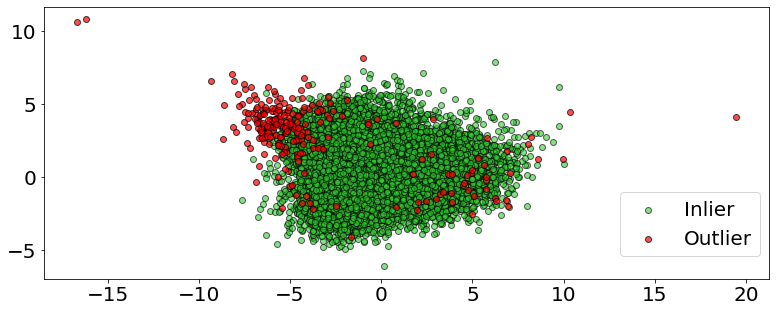

In [46]:
plt.scatter(X_pca[df['BoxPlot']==0][:,0],X_pca[df['BoxPlot']==0][:,1],c='limegreen',label='Inlier',alpha=0.6,edgecolor='k')
plt.scatter(X_pca[df['BoxPlot']==1][:,0],X_pca[df['BoxPlot']==1][:,1],c='red',label='Outlier',alpha=0.7,edgecolor='k')

plt.legend(loc='center left', prop=dict(size=20),bbox_to_anchor=(0.78, 0.2))
plt.show()

In [61]:
aaa=df['BoxPlot'].copy()

In [62]:
label = aaa

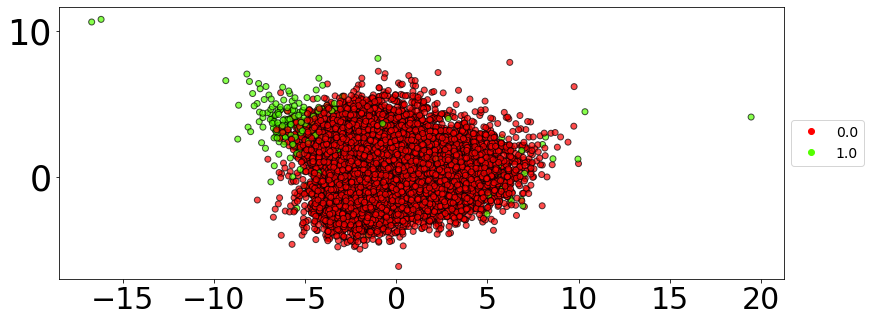

In [63]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
labels = np.unique(label)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels,loc='center left', prop=dict(size=14),bbox_to_anchor=(1, 0.5))

In [102]:
df_out_250_boxPlot=df.loc[out]
df_out_250_boxPlot

feature    chroma_stft       mfcc                                          \
statistics        mean        max                                           
number              01         01        03        04        07        11   
track_id                                                                    
107535        2.896370 -11.667795 -2.491983 -3.488628 -1.908995 -2.003428   
52859        -1.163777  -1.810330 -1.973254 -1.386027 -1.666474 -1.569751   
123683       -0.629058  -2.255914 -2.268693 -3.448507 -1.979672 -0.997045   
17998        -2.548886  -1.919025 -2.442810 -3.538427 -2.266125 -3.018985   
19632        -2.928057  -2.968111 -1.761644 -3.400550 -2.860262 -2.159789   
...                ...        ...       ...       ...       ...       ...   
46718        -1.114174  -6.070042  1.222389 -1.756837 -0.886422 -1.707416   
125108       -0.399270  -1.609948 -2.550116 -3.538427 -1.151167 -1.974049   
18004        -2.378759  -2.462612 -2.518892 -3.537354 -2.860262 -1.521173   
22354         0.898554   1.020622  0.107025  0.625478  0.383188  0.466173   
20156        -0.744842  -2.500709 -1.630602 -2.739244 -1.845870 -1.413452   

feature                                             ...                      \
statistics      mean       min                      ...       std             
number            02        02        04        05  ...        01        02   
track_id                                            ...                       
107535     -5.127796 -0.786433  0.815154  1.728673  ... -3.151970 -3.053178   
52859       1.990278  0.469769  1.479845  2.013732  ... -2.684922 -2.813989   
123683      2.052908  0.469769 -3.311650  0.794357  ... -2.308287 -1.683647   
17998       2.093927  0.469769 -1.878073  1.727146  ... -2.522551 -2.090609   
19632       1.211069  0.469769 -1.738322  0.303840  ... -2.513276 -1.964320   
...              ...       ...       ...       ...  ...       ...       ...   
46718      -0.866787  0.469769  1.060359  1.502914  ... -1.789104  0.581202   
125108      1.627684  0.469769 -1.983725 -0.022549  ... -2.588341 -2.031054   
18004       0.900627  0.469769 -1.772811  1.219327  ... -1.781273 -0.629080   
22354      -1.833221 -5.129928 -0.349905  0.265077  ...  0.088092  0.149904   
20156       0.471432  0.469769 -2.690346  0.830370  ... -1.729959 -0.674293   

feature              spectral_bandwidth spectral_contrast                      \
statistics                     kurtosis               max                 min   
number            04                 01                03        04        02   
track_id                                                                        
107535     -2.825824          58.117515         -1.683150 -2.351247 -2.472157   
52859      -2.501976          55.633157         -0.411459 -0.530531  2.779913   
123683     -1.177917          19.989822          0.149673 -0.028496  1.818557   
17998      -1.866510          18.401206          0.479335  0.009432  0.883217   
19632      -1.507123          17.346706         -0.207543 -0.166217 -1.366168   
...              ...                ...               ...       ...       ...   
46718      -1.692549          -0.297336          1.136324 -0.546617  0.436748   
125108     -1.670841           4.180587         -0.368984  0.453247  0.586533   
18004      -1.018000           4.163309          0.114116 -0.928998  1.477742   
22354      -0.512695          -0.137778          0.611937  0.899480 -1.598133   
20156      -0.987069           4.149087         -0.059179 -0.477189 -0.476181   

feature      tonnetz             metadata   outliers  
statistics       std                track             
number            01            genre_top             
track_id                                              
107535     -2.486869         Instrumental  57.892448  
52859      -0.553885         Experimental  55.408090  
123683     -0.229626  Old-Time / Historic  19.764754  
17998      -0.887573  Old-Time / Historic  18.176139  
19

In [104]:
df_out_250_boxPlot['metadata','track','genre_top'].value_counts()

Old-Time / Historic    119
Experimental            38
Electronic              37
Instrumental            20
Rock                    14
Classical               10
International            6
Hip-Hop                  3
Pop                      2
Jazz                     1
Name: (metadata, track, genre_top), dtype: int64

In [105]:
df['metadata','track','genre_top'].value_counts()

Rock                   7103
Electronic             6314
Experimental           2251
Hip-Hop                2201
Folk                   1519
Instrumental           1350
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: (metadata, track, genre_top), dtype: int64

## DBSCAN

In [39]:
dist = pdist(X, 'euclidean')


In [ ]:
df_DbScan=features.copy()

In [37]:
dist = pdist(X, 'cityblock')


In [38]:
print(dist)

[12.57593282 11.26361147 17.49543925 ... 14.58899126 18.89770544
 16.65287892]


In [39]:
dist = squareform(dist)


In [40]:
print(dist)

[[ 0.         12.57593282 11.26361147 ... 19.20005391 14.25727439
  16.13277748]
 [12.57593282  0.         11.91516388 ... 19.18124682 16.81297181
  21.91156235]
 [11.26361147 11.91516388  0.         ... 16.37023034 15.76359697
  15.60174228]
 ...
 [19.20005391 19.18124682 16.37023034 ...  0.         14.58899126
  18.89770544]
 [14.25727439 16.81297181 15.76359697 ... 14.58899126  0.
  16.65287892]
 [16.13277748 21.91156235 15.60174228 ... 18.89770544 16.65287892
   0.        ]]


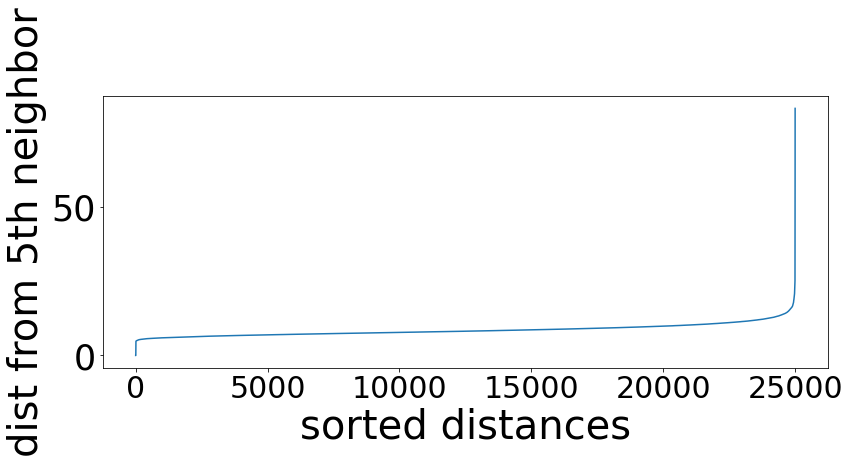

In [41]:

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k)
plt.xlabel('sorted distances')
plt.tick_params(axis='both', which='major')
plt.show()

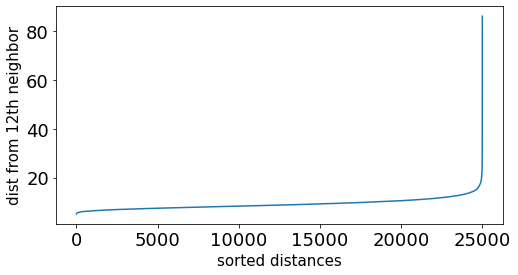

In [17]:

k = 12

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

<Figure size 1440x864 with 0 Axes>

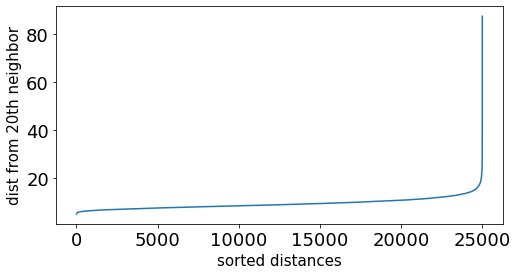

In [42]:

SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
k = 20

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

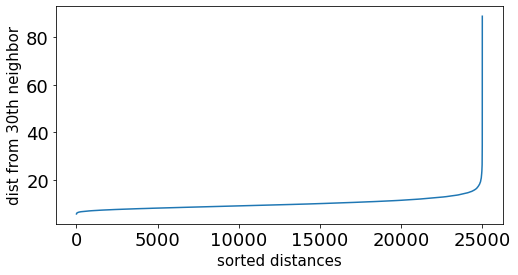

In [18]:
k = 30

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

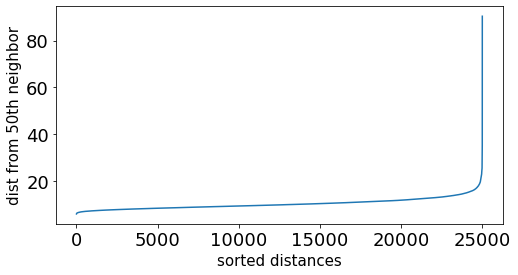

In [19]:
k = 50

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [40]:
sil_quattro = list()


In [41]:

dbscan = DBSCAN(eps=20, min_samples=0,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))
  


0.34752288836234657


In [42]:
dbscan = DBSCAN(eps=20, min_samples=1,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))
  


0.34752288836234657


In [44]:
dbscan = DBSCAN(eps=20, min_samples=2,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))
  

0.5636782338917535


In [45]:
dbscan = DBSCAN(eps=20, min_samples=3,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))
  

0.7067038399846581


In [46]:
dbscan = DBSCAN(eps=20, min_samples=4,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))
  

0.7067038399846581


In [47]:
dbscan = DBSCAN(eps=20, min_samples=5,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [48]:
dbscan = DBSCAN(eps=20, min_samples=6,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [49]:
dbscan = DBSCAN(eps=20, min_samples=7,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [50]:
dbscan = DBSCAN(eps=20, min_samples=8,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [51]:
dbscan = DBSCAN(eps=20, min_samples=9,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [52]:
dbscan = DBSCAN(eps=20, min_samples=10,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [53]:
dbscan = DBSCAN(eps=20, min_samples=11,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [54]:
dbscan = DBSCAN(eps=20, min_samples=12,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [55]:
dbscan = DBSCAN(eps=20, min_samples=13,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [56]:
dbscan = DBSCAN(eps=20, min_samples=14,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [57]:
dbscan = DBSCAN(eps=20, min_samples=15,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [58]:
dbscan = DBSCAN(eps=20, min_samples=16,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [59]:
dbscan = DBSCAN(eps=20, min_samples=17,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [60]:
dbscan = DBSCAN(eps=20, min_samples=18,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [61]:
dbscan = DBSCAN(eps=20, min_samples=19,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


In [62]:
dbscan = DBSCAN(eps=20, min_samples=20,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
sil_quattro.append(silhouette_score(X, dbscan.labels_))

0.7067038399846581


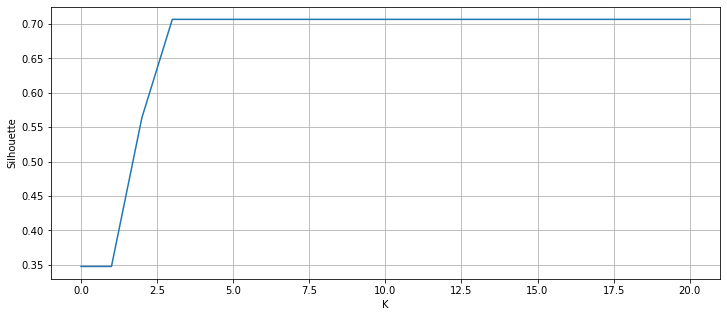

In [63]:
plt.figure(figsize=(12,5))
plt.plot(sil_quattro)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

In [27]:
dbscan = DBSCAN(eps=18, min_samples=20,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.5863584134621469


In [28]:
dbscan = DBSCAN(eps=18, min_samples=15,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.589878438615593


In [29]:
dbscan = DBSCAN(eps=19, min_samples=15,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.6592463063461103


In [30]:

dbscan = DBSCAN(eps=20, min_samples=25,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
    


0.7067038399846581


In [31]:
dbscan = DBSCAN(eps=20, min_samples=50,  metric='cityblock')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))
    

0.7067038399846581


In [32]:
dbscan = DBSCAN(eps=20, min_samples=5, metric='cityblock')
dbscan.fit(X)
dbscan.labels_
np.unique(dbscan,return_counts=True)

(array([DBSCAN(eps=20, metric='cityblock')], dtype=object),
 array([1], dtype=int64))

In [33]:
print ('silhouette', silhouette_score(X, dbscan.labels_))

silhouette 0.7067038399846581


In [34]:
np.unique(dbscan.labels_, return_counts=True)


(array([-1,  0], dtype=int64), array([   13, 24987], dtype=int64))

In [35]:
dbscan = DBSCAN(eps=20, min_samples=10, metric='cityblock')
dbscan.fit(X)
dbscan.labels_
np.unique(dbscan,return_counts=True)

(array([DBSCAN(eps=20, metric='cityblock', min_samples=10)], dtype=object),
 array([1], dtype=int64))

In [36]:
print ('silhouette', silhouette_score(X, dbscan.labels_))

silhouette 0.7067038399846581


In [37]:
np.unique(dbscan.labels_, return_counts=True)


(array([-1,  0], dtype=int64), array([   13, 24987], dtype=int64))

In [64]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
def condition(x): return x == -1
output = [idx for idx, element in enumerate(dbscan.labels_) if condition(element)]

In [66]:
print(output)

[489, 493, 1374, 5540, 6782, 8305, 9797, 12749, 12751, 12752, 15454, 16643, 22484]


In [69]:
df=df_DbScan.copy()

In [70]:
df.head()

feature    chroma_stft      mfcc                                          \
statistics        mean       max                                           
number              01        01        03        04        07        11   
track_id                                                                   
2             1.864015  0.615044 -0.818777  0.213081 -0.096828 -0.476763   
3            -0.103482  0.624062 -0.015655  1.446340  1.204416 -0.573946   
5             0.148445 -0.247580 -0.886495  0.540787 -0.723140 -0.529327   
10           -0.594383  0.509512 -0.554957 -0.688499 -1.283151 -0.764907   
134          -0.195610 -0.262829 -0.611942  1.035116 -0.125502  0.375753   

feature                                             ...                      \
statistics      mean       min                      ...      skew       std   
number            02        02        04        05  ...        04        01   
track_id                                            ...                       
2          -0.902046  0.469769 -0.305931 -2.115932  ...  0.444004  0.622077   
3          -0.793508 -0.160231  1.279239 -1.553918  ...  0.333143  1.210474   
5          -0.415501 -1.649346  0.801040 -0.880009  ...  0.203958  0.505090   
10          0.362832  0.469769 -0.265699  0.621925  ... -0.511909  0.831299   
134        -0.625369  0.437693 -1.880751 -0.548531  ... -0.381898  0.832834   

feature                        spectral_bandwidth spectral_contrast            \
statistics                               kurtosis               max             
number            02        04                 01                03        04   
track_id                                                                        
2           0.127778  0.148286          -0.114547         -0.721109 -0.921316   
3           0.377015  0.358945          -0.173787         -0.148690 -0.929216   
5           0.203623  0.743308          -0.232903         -0.785605 -0.485505   
10          0.682846 -0.983444          -0.251092          0.517845 -1.477813   
134         0.954349  2.841332          -0.253663         -0.273997 -0.780149   

feature                tonnetz  metadata  
statistics       min       std     track  
number            02        01 genre_top  
track_id                                  
2          -0.630913 -1.322089   Hip-Hop  
3          -1.948937 -0.466338   Hip-Hop  
5          -0.617137 -0.567065   Hip-Hop  
10          1.067838 -1.111215       Pop  
134        -1.453616 -0.736969   Hip-Hop  

[5 rows x 21 columns]

In [77]:
df.iloc[output]

feature    chroma_stft       mfcc                                          \
statistics        mean        max                                           
number              01         01        03        04        07        11   
track_id                                                                    
3558         -2.645644  -1.773655  1.585491 -0.779861  4.089594  4.552160   
3563         -1.278334  -0.698271  2.076139  0.342526  4.865243  4.180636   
9721          1.287532   2.148244 -1.266777 -2.673596  0.789874  0.019190   
34506         0.433573  -5.377242  0.781212 -0.982655 -0.251530 -0.837349   
43063        -0.247480   0.293348  4.693541  4.633934  7.268657  9.080338   
52859        -1.163777  -1.810330 -1.973254 -1.386027 -1.666474 -1.569751   
60992         0.738933  -1.761405 -0.073328  0.979127  1.011434 -0.269917   
75971        -1.877512  -3.440617 -0.230228 -2.074753 -2.860262 -1.911257   
75973        -2.002748  -2.705209  1.464813 -2.022135 -0.246197 -0.646681   
75974        -2.848363  -2.104390  0.762362 -1.496493 -2.232202 -2.460422   
97771        -2.089523  -0.496479 -0.492403 -0.991755  2.868327 -0.282664   
107535        2.896370 -11.667795 -2.491983 -3.488628 -1.908995 -2.003428   
136928        1.431200  -1.060540  2.008853  0.931082  5.114974  4.817806   

feature                                             ...                       \
statistics      mean       min                      ...       skew       std   
number            02        02        04        05  ...         04        01   
track_id                                            ...                        
3558        0.703266  0.469769 -2.869097 -2.146934  ...  -0.375857 -0.096355   
3563       -1.840301 -0.400873 -5.464075 -3.386629  ...  -0.665991  2.916079   
9721       -2.189212 -0.471676 -1.989635  0.853695  ...  -7.867051 -0.278586   
34506      -1.827955  0.469769  1.457141  2.962744  ...  -0.350233 -2.779696   
43063      -2.296579 -5.999240 -5.077072 -4.638391  ...   0.674015  2.577879   
52859       1.990278  0.469769  1.479845  2.013732  ...  -1.765598 -2.684922   
60992      -0.171099  0.469769  1.789010  2.962744  ... -10.361211 -1.890083   
75971      -8.335385 -6.135193  1.138439  0.265813  ...   1.354844  1.177732   
75973      -6.828041 -6.530257 -1.593989  0.031394  ...  -0.365153 -0.063815   
75974      -7.749922 -6.872815  0.492914  0.347312  ...   0.873872  1.712078   
97771      -4.089356 -1.745289  0.996914  2.354607  ...   2.529626  0.545902   
107535     -5.127796 -0.786433  0.815154  1.728673  ...   0.486248 -3.151970   
136928     -3.493925 -6.811181 -2.064195 -2.196249  ...   0.795183  3.886846   

feature                        spectral_bandwidth spectral_contrast            \
statistics                               kurtosis               max             
number            02        04                 01                03        04   
track_id                                                                        
3558        3.389639  1.864004           1.851799          3.901637  5.500875   
3563        0.280200  2.185275          -0.236092          4.351498  3.974815   
9721       -1.843156 -1.688693           2.192037         -1.291890  0.390039   
34506      -1.553583 -1.810191          -0.272871         -1.639137 -2.401456   
43063       6.102383  8.694571          -0.273176          1.403187  3.490355   
52859      -2.813989 -2.501976          55.633157         -0.411459 -0.530531   
60992      -1.809397 -1.363501           3.006867          0.100346 -0.795847   
75971       2.897959 -1.839266          -0.290899         -1.932536 -1.484208   
75973       2.388991 -0.546812          -0.256942         -2.156705  1.268699   
75974       2.483279 -1.850792          -0.216728         -2.583600 -1.902705   
97771       1.783319 -1.821032           1.903315         -0.018990  3.090691   
107535     -3.053178 -2.825824          58.117515         -1.683150 -2.351247   
136928      0.280801 -0.578880   

In [82]:
df_DbScan['metadata','track','genre_top'].value_counts()

Rock                   7103
Electronic             6314
Experimental           2251
Hip-Hop                2201
Folk                   1519
Instrumental           1350
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: (metadata, track, genre_top), dtype: int64

## 13 outliers, 9 sono con label Experimental

In [109]:
df_outliers.loc[136928,:]

feature             statistics  number   
chroma_stft         mean        01                 1.4312
mfcc                max         01               -1.06054
                                03                2.00885
                                04               0.931082
                                07                5.11497
                                11                4.81781
                    mean        02               -3.49393
                    min         02               -6.81118
                                04               -2.06419
                                05               -2.19625
                                11               -3.55393
                    skew        04               0.795183
                    std         01                3.88685
                                02               0.280801
                                04               -0.57888
spectral_bandwidth  kurtosis    01              -0.217173
spectral_contrast   max       

## i 13 outliers in dbscan sono outliers anche con il boxplot

## DBSCAN DISTANZA EUCLIDEA

In [40]:
df_DbScanEuclidea=features.copy()

In [65]:
distEuclidea = pdist(X)


In [66]:
print(X)

[[ 1.86401457  0.6150445  -0.81877701 ... -0.92131634 -0.63091256
  -1.32208865]
 [-0.10348244  0.62406228 -0.01565505 ... -0.92921645 -1.94893681
  -0.46633816]
 [ 0.14844478 -0.24758031 -0.88649537 ... -0.48550455 -0.61713665
  -0.56706532]
 ...
 [-0.74373272  0.16011768  0.35691634 ... -0.16975495 -0.29982352
   1.32080363]
 [-0.83523021  0.08434064 -0.49527789 ...  0.0099262  -0.49073173
   0.70909713]
 [ 0.71311626  0.06668385 -1.46894598 ... -0.90788814 -0.20152869
  -0.32983617]]


In [67]:
print(distEuclidea)

[3.78637741 3.59793578 5.22336188 ... 4.03549743 5.50272478 4.89073315]


In [68]:
distEuclidea = squareform(distEuclidea)

In [16]:
print(distEuclidea)

[[0.         3.78637741 3.59793578 ... 5.80097684 4.62435101 4.88609768]
 [3.78637741 0.         3.49967068 ... 5.27613388 4.35679735 5.99945769]
 [3.59793578 3.49967068 0.         ... 4.8413937  4.30212653 4.53165017]
 ...
 [5.80097684 5.27613388 4.8413937  ... 0.         4.03549743 5.50272478]
 [4.62435101 4.35679735 4.30212653 ... 4.03549743 0.         4.89073315]
 [4.88609768 5.99945769 4.53165017 ... 5.50272478 4.89073315 0.        ]]


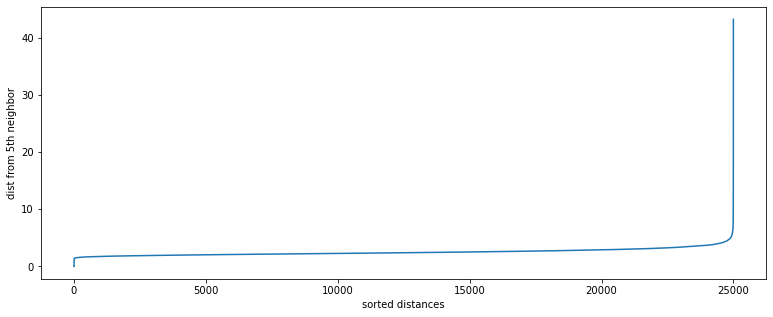

In [17]:

k = 5
kth_distances = list()
for d in distEuclidea:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k)
plt.xlabel('sorted distances')
plt.tick_params(axis='both', which='major')
plt.show()

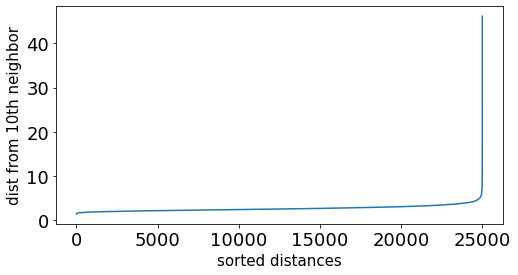

In [19]:
k = 10

kth_distances = list()
for d in distEuclidea:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

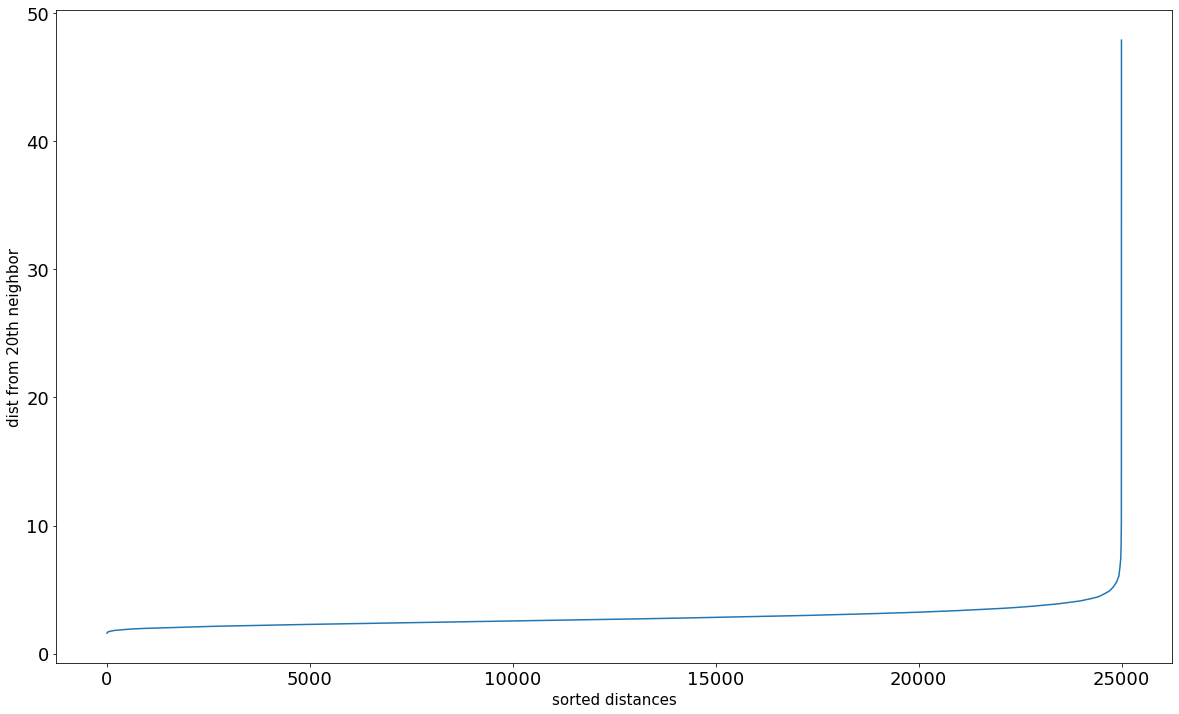

In [46]:

SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
k = 20

kth_distances = list()
for d in distEuclidea:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [21]:
dbscan = DBSCAN(eps=5, min_samples=5,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.5500764076386244


In [23]:
dbscan = DBSCAN(eps=5, min_samples=10,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.5527035834058049


In [24]:
dbscan = DBSCAN(eps=5, min_samples=15,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.5513128091351406


In [25]:
dbscan = DBSCAN(eps=5, min_samples=20,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.5405394814439836


In [26]:
dbscan = DBSCAN(eps=5, min_samples=30,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.544858229272682


In [27]:
dbscan = DBSCAN(eps=7, min_samples=10,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.7999689278360618


In [28]:
dbscan = DBSCAN(eps=7, min_samples=20,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.7999689278360618


In [30]:
dbscan = DBSCAN(eps=8, min_samples=10,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.8696170176242627


In [31]:
dbscan = DBSCAN(eps=8, min_samples=20,  metric='euclidean')
dbscan.fit(X)
print(silhouette_score(X, dbscan.labels_))

0.8189266007355305


In [69]:
dbscan = DBSCAN(eps=8, min_samples=10, metric='euclidean')
dbscan.fit(X)
dbscan.labels_
np.unique(dbscan,return_counts=True)

(array([DBSCAN(eps=8, min_samples=10)], dtype=object), array([1], dtype=int64))

In [70]:
np.unique(dbscan.labels_, return_counts=True)


(array([-1,  0], dtype=int64), array([    3, 24997], dtype=int64))

In [71]:
def condition(x): return x == -1
output = [idx for idx, element in enumerate(dbscan.labels_) if condition(element)]

In [72]:
print(output)

[6782, 8305, 16643]


In [41]:
df_DbScanEuclidea['dbScan']=0

In [75]:
for i in output:
    df_DbScanEuclidea.iat[i,21]=1

    print(i)

6782
8305
16643


In [42]:
df_DbScanEuclidea.iat[6782,21]=1
df_DbScanEuclidea.iat[8305,21]=1
df_DbScanEuclidea.iat[16643,21]=1


In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

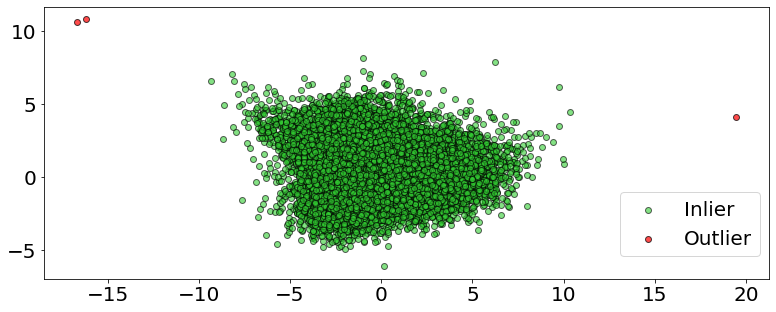

In [47]:
plt.scatter(X_pca[df_DbScanEuclidea['dbScan']==0][:,0],X_pca[df_DbScanEuclidea['dbScan']==0][:,1],c='limegreen',label='Inlier',alpha=0.6,edgecolor='k')
plt.scatter(X_pca[df_DbScanEuclidea['dbScan']==1][:,0],X_pca[df_DbScanEuclidea['dbScan']==1][:,1],c='red',label='Outlier',alpha=0.7,edgecolor='k')

plt.legend(loc='center left', prop=dict(size=20),bbox_to_anchor=(0.78, 0.2))
plt.show()

In [76]:
aaa=df_DbScanEuclidea['dbScan'].copy()

In [77]:
label = aaa

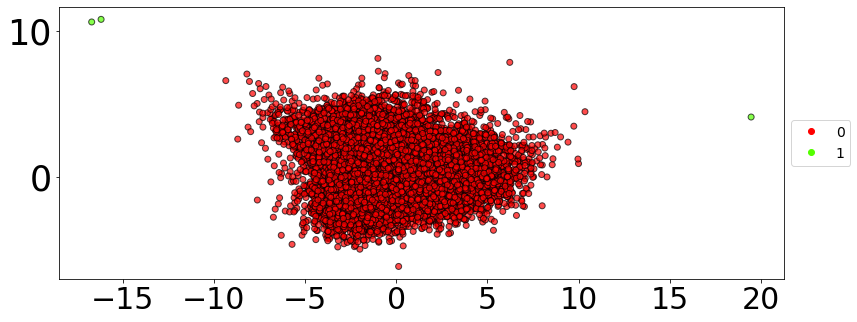

In [78]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
labels = np.unique(label)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels,loc='center left', prop=dict(size=14),bbox_to_anchor=(1, 0.5))

## questi 3 outliers erano anche tra quelli calcolati con la distanza manhattan

In [50]:
df.iloc[6782]

feature             statistics  number   
chroma_stft         mean        01               -0.24748
mfcc                max         01               0.293348
                                03                4.69354
                                04                4.63393
                                07                7.26866
                                11                9.08034
                    mean        02               -2.29658
                    min         02               -5.99924
                                04               -5.07707
                                05               -4.63839
                                11               -7.32228
                    skew        04               0.674015
                    std         01                2.57788
                                02                6.10238
                                04                8.69457
spectral_bandwidth  kurtosis    01              -0.273176
spectral_contrast   max       

In [51]:
df.iloc[8305]

feature             statistics  number   
chroma_stft         mean        01               -1.16378
mfcc                max         01               -1.81033
                                03               -1.97325
                                04               -1.38603
                                07               -1.66647
                                11               -1.56975
                    mean        02                1.99028
                    min         02               0.469769
                                04                1.47985
                                05                2.01373
                                11                1.68974
                    skew        04                -1.7656
                    std         01               -2.68492
                                02               -2.81399
                                04               -2.50198
spectral_bandwidth  kurtosis    01                55.6332
spectral_contrast   max       

In [52]:
df.iloc[16643]

feature             statistics  number   
chroma_stft         mean        01                2.89637
mfcc                max         01               -11.6678
                                03               -2.49198
                                04               -3.48863
                                07               -1.90899
                                11               -2.00343
                    mean        02                -5.1278
                    min         02              -0.786433
                                04               0.815154
                                05                1.72867
                                11                 2.2384
                    skew        04               0.486248
                    std         01               -3.15197
                                02               -3.05318
                                04               -2.82582
spectral_bandwidth  kurtosis    01                58.1175
spectral_contrast   max       